In [1]:
%run init.ipynb

# Kristalografske grupe i popločavanje


Popločavanje je prekrivanje ravni ili prostora geometrijskim figurama (poligonima odnosno telima) čije se unutrašnjosti ne preklapaju.
Posebno su zanimljiva popločavanja kod kojih se koriste podudarne firgure tako da imamo grupu izometrija koje jednu figuru preslikavaju na sve ostale. Jedan od primera takvog popločavanja su kristalne rešetke, zbog čega se takve grupe nazivaju kristalografskim grupama.

U ovom radu ćemo se baviti popločavanjima u euklidskoj ravni $\mathbb{E}^2$.
Prvo ćemo definisati pojam kristalografske grupe u $\mathbb{E}^2$.

__*Definicija:*__ Za grupu $G$ kažemo da je *konačno generisana* ako postoji konačan skup elemenata grupe koji generiše sve elemente grupe

__*Definicija:*__ *Konačna fundamentalna oblast* $F$ grupe izometrija $G$ u $\mathbb{E}^2$ je unija konačno mnogo poligona takva da važi:  
1. $\displaystyle{\bigcup_{g\in G}g(F)} = \mathbb{E}^2$
2. $(\forall g\in G)(\mathring{F} \cap g(\mathring{F})= \emptyset)$

Fundamentalna oblasta po definiciji u opštem slučaju ne mora da bude poligon ali je za potrebe ovog rada dovoljno da se ograničimo na poligone. Takođe, opštija definicija bi zahtevala pojmove iz topologije, dok smo se ovako zadržali da geometrijskoj terminologiji. 

__*Definicija:*__ _Kristalografska grupa_ je konačno generisana grupa izometrija koja ima konačnu fundamentalnu oblast.

Poznato je da u $\mathbb{E}^2$ postoji 17 različitih (do na izomorfizam) kristalografskih grupa. Ovde mislimo na algebarski izomorfizam grupa [1].

U okviru ovog rada bavićemo se svojstvima kristalografskih grupa u $\mathbb{E}^2$, svojstvima fundamentalnih oblasti i algoritmima za konstruisanje fundamentalnih poligona koji na kraju mogu imati praktičnu primenu u grafičkom dizajniranju popločavanja. Algoritme ćemo implementirati u programskom jeziku Python.

## Izometrijske transformacije u $\mathbb{R}^2$

Ako u $\mathbb{E}^2$ uvedemo koordinatni sistem, tačke predstavljamo dvodimenzionim koordinatama tj. elementima $\mathbb{R}^2$. Koordinate tacke $A$ označavaćemo sa $(A_x, A_y)$. Analitički ćemo izometrijsku transformaciju u $\mathbb{R}^2$ predstaviti kao specijalan slučaj afine transformacije. Ako je $A^´ = g(A)$ tada imamo:
$$A^´_x = pA_x + qA_y + c_x$$
$$A^´_y = rA_x + sA_y + c_y$$
Korišćenjem računa sa matricama to možemo predstaviti:

$$\begin{bmatrix}p & q\\ r & s\end{bmatrix} \begin{bmatrix}A_x\\ A_y \end{bmatrix} + \begin{bmatrix}c_x\\ c_y\end{bmatrix} = \begin{bmatrix}A^´_x\\ A^´_y \end{bmatrix}$$

Korišćenjem homogenih koordinata ovo možemo predstaviti kao množenje trodimenzionih matrica:

$$\begin{bmatrix}p & q & c_x\\ r & s&c_y \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix}A_x\\ A_y\\1\end{bmatrix} = 
\begin{bmatrix}A^´_x\\ A^´_y\\1\end{bmatrix}$$

Na primer, translacija za vektor $(t_x, t_y)$ bi se predstavila kao:

$$\begin{bmatrix}1 & 0 & t_x\\ 0 & 1&t_y \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix}A_x\\ A_y\\1\end{bmatrix} = 
\begin{bmatrix}A_x+t_x\\ A_y+t_y\\1\end{bmatrix}$$

Primer sa konkretnim brojevima u sintaksi programskog jezika Python:

In [2]:
tx,ty = 5,6
t = np.array([
    [ 1,  0,  tx],
    [ 0,  1,  ty],
    [ 0,  0,  1] ])
A = np.array([2,3,1])
t@A

array([7, 9, 1])

U primeru smo translirali tačku $A(2,3)$ za vektor $(5,6)$.

### Funkcije koje konstruišu matrice za osnovne izomejtrijske transformacije

Funkcija `transl` konstruiše matricu za translaciju:

In [3]:
def transl(tx,ty):
    return np.array([
        [ 1,  0,  tx],
        [ 0,  1,  ty],
        [ 0,  0,  1]])

Funkcija `rot0` konstruiše matricu za rotaciju oko koordinatnog početka za zadati ugao:

In [4]:
def rot0(fi):
    return np.array([
        [ cos(fi),  sin(fi),  0],
        [-sin(fi),  cos(fi),  0],
        [       0,        0,  1] ])

Funkcija `reflX` konstruiše matricu za refleksiju oko x-ose:

In [5]:
def reflX():
    return np.array([
        [ 1,  0,  0],
        [ 0,  -1,  0],
        [ 0,  0,  1] ])

Prednost korišćenja homogenih koordinata je u tome što slaganje izometrija računamo kao množenje matrica. Na taj način funkciju `rot`, koja konstruiše matricu za rotaciju oko zadate tačke, možemo definisati kao:

In [6]:
def rot(fi, cx, cy):
    return transl(cx, cy) @  rot0(fi) @ transl(-cx, -cy)

Slično konstruišemo refleksiju oko proizvoljne ose zadate koordinatama jedne tačke na toj osi i uglom koji ona pravi sa x-osom:

In [7]:
def refl(ax,ay,fi):
    return transl(ax,ay) @ rot0(fi) @ reflX() @ rot0(-fi) @ transl(-ax,-ay)

Ukoliko osa prolazi kroz koordinatni početak i tačku a, matricu osne refleksije možemo i direktno konstruisati bez primene trigonometrijskih funkcija  na sledeći način:

In [8]:
def refl1(ax,ay):
    r = (ax*ax+ay*ay)
    #r=1  
    return np.array([
        [ (ay*ay-ax*ax)/r,  2*ax*ay/r,  0],
        [ 2*ax*ay/r, (ax*ax-ay*ay)/r ,  0],
        [         0,                0,  1] ])
    
refl1(0,1)

array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

Koristeći to možemo konstruisati refleksiju oko ose zadate dvema tačkama

In [9]:
def refl2(ax,ay,bx,by):
    return transl(ax,ay)@refl1(bx-ax,by-ay)@transl(-ax,-ay)

refl2(0,0,0,1) @ (2,2,1)

array([ 2., -2.,  1.])

** klizajuća

### Predstavljanje grupa homogenim matricama i njihova implementacija

Grupu **p1** čine dve translacije pa je generišu dva vektora $v$ i $u$

$$\begin{bmatrix}1 & 0 & v_x\\ 0 & 1&v_y \\ 0 & 0 & 1\end{bmatrix}, \begin{bmatrix}1 & 0 & u_x\\ 0 & 1&u_y \\ 0 & 0 & 1\end{bmatrix}$$

Grupu pored generičkih izometrija čine i njima inverzne izometrije kao i identitet pa je implementacija grupe **p1** sa parametrima: 

In [10]:
I = np.array([
        [ 1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  1]])
def inv(x):
    return np.linalg.inv(x)

In [11]:
def p1(x1,y1,x2,y2):
    tr1 = transl(x1, y1)
    tr2 = transl(x2, y2)
    return [I,tr1,tr2,inv(tr1), inv(tr2)]

Grupu **p2** čine tri centralne simetrije. Fundamentalni domen može biti trougaoni ili četvorougaoni. Radi lakšeg implementiranja, posmatraćemo kao jednu simetriju (kojom fundamentalni domen proširujemo do paralelograma) i dve translacije. Generiše se vektorima tih translacija (stranice dobijenog paralelograma) i jednim temenom. 

$$\begin{Bmatrix}\begin{bmatrix}-1 & 0 & 2a_x +v_x+u_x\\ 0 & -1& 2a_y +v_y+u_y \\ 0 & 0 & 1\end{bmatrix}&,& \begin{bmatrix}1 & 0 & v_x\\ 0 & 1&v_y \\ 0 & 0 & 1\end{bmatrix}&,& \begin{bmatrix}1 & 0 & u_x\\ 0 & 1&u_y \\ 0 & 0 & 1\end{bmatrix}  \end{Bmatrix}$$


In [12]:
def p2(ax,ay, x1,y1,x2,y2):
    sym = rot(pi,ax,ay)
    return p1(x1,x2,y1,y2) + [sym, inv(sym)]

Grupu **pm** čine refleksije i translacije. Fundamentalni domen je pravougaonik* . Generišu ga jedno teme i dva vektora.

$$\begin{Bmatrix}\begin{bmatrix} \frac{v_{x}^{2}-v_{y}^{2} }{v_{x}^{2}+v_{y}^{2}}& \frac{2v_{x}v_{y}}{v_{x}^{2}+v_{y}^{2}}& \frac{2a_yv_{x}v_{y} + a_x(v_{x}^{2}-v_{y}^{2}-1)}{v_{x}^{2}+v_{y}^{2}}\\\frac{2v_{x}v_{y}}{v_{x}^{2}+v_{y}^{2}}&\frac{v_{y}^{2}-v_{x}^{2} }{v_{x}^{2}+v_{y}^{2}}& \frac{2a_xv_{x}v_{y} + a_y(v_{x}^{2}-v_{y}^{2}-1)}{v_{x}^{2}+v_{y}^{2}} \\ 0 & 0 & 1\end{bmatrix} & ,& \begin{bmatrix}1 & 0 & u_x\\ 0 & 1&u_y \\ 0 & 0 & 1\end{bmatrix}  \end{Bmatrix}$$


In [13]:
def pm(ax,ay, x1,y1,x2,y2):
    ref = refl2(ax,ay, ax+x1,ay+y1)
    return p1(2*x1, 2*y1,x2,y2) +[ref]

**

## Konstruisanje grupa izometrijskih transformacija

**  uz teorijski uvod implementirati funkcije za konstruisanje grupa iz transformacija sa primerima crtanja i funkcije za svih 17 grupa

***

## Dirihleova fundamentalna oblast

** teorijsko objasnjenje

### Konstrukcija Dirihleove fundamentalne oblasti 

** opis konsturkcije i impementacija u pajtonu

## Podfundamentalna oblast

## Modifikacija fundamentalne oblasti na osnovu podfundamentalne

### Implementacija 

## Konačni primeri

In [14]:
def generisi(gen,okvir):
    xmin,ymin,xmax,ymax = okvir
    l = []
    def generisi_rek(iz):
        for i in l:
            if(np.linalg.norm(iz - i) < 0.00001):
                return
        l.append(iz)
        x,y,_ = iz @ (0,0,1)
        if(x>xmax or x<xmin or y>ymax or y<ymin):
            return
        for i in gen:
            generisi_rek(i @ iz)
            
    generisi_rek(transl(0,0))
    return l
        

In [15]:
def crtaj(izl,p,axes):
    for i in izl:
        q = affine_h(p,i)
        patch = PolygonPatch(q, facecolor='#ff0000', edgecolor='#000000', alpha=0.3, zorder=2)
        axes.add_patch(patch) 
        

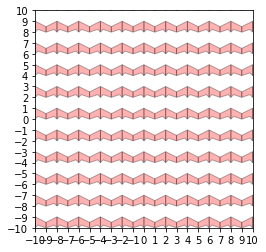

In [16]:
bx = plt.axes()

                    
m = []
p = Polygon([(0,0),(0.25, 0.25), (1,0), (1,0.5), (0,1)])

izom = pm(0,0,1,0,0,2)
okvir = [-10,-10,10,10]

izomgen = generisi(izom,okvir)
crtaj(izomgen,p,bx)

xmin,ymin,xmax,ymax = okvir
bx.set_xlim(-10,10)
bx.set_xticks(range(-10,11))
bx.set_ylim(-10,10)
bx.set_yticks(range(-10,11))
bx.set_aspect(1)
plt.show()

# Bibliografija

1. Schattschneider, Doris. "The plane symmetry groups: their recognition and notation." *The American Mathematical Monthly* 85.6 (1978): 439-450.